#### Code 3.1 $Pr(\text{Vampire} | \text{positive})$

In [469]:
Pr_positive_vampire = 0.95
Pr_positive_mortal = 0.01
Pr_vampire = 0.001
Pr_positive = Pr_positive_vampire* Pr_vampire + Pr_positive_mortal * (1 - Pr_vampire)
Pr_vampire_positive = (Pr_positive_vampire * Pr_vampire) / Pr_positive

0.08683729433272395

#### Code 3.2

In [470]:
using Distributions
p_grid = range(0, stop=1, length=1000)
prob_p = fill(1,1000)
prob_data = pdf.(Binomial.(9, p_grid),6)
posterior = prob_data .* prob_p 
posterior = posterior / sum(posterior);

#### Code 3.3: Drawing 10000 samples from the above posterior distribution

In [471]:
using StatisticalRethinking
N = 10000
samples = sample(p_grid, Weights(posterior),N);

- `sample()` is a function from the `StatisticalRethinking` package 
- *The function randomly pulls values from a vector. The vector in this case is p_grid and it's probability is given by posterior*

#### Code 3.4 - 3.5: Sampling from posterior distribution figure

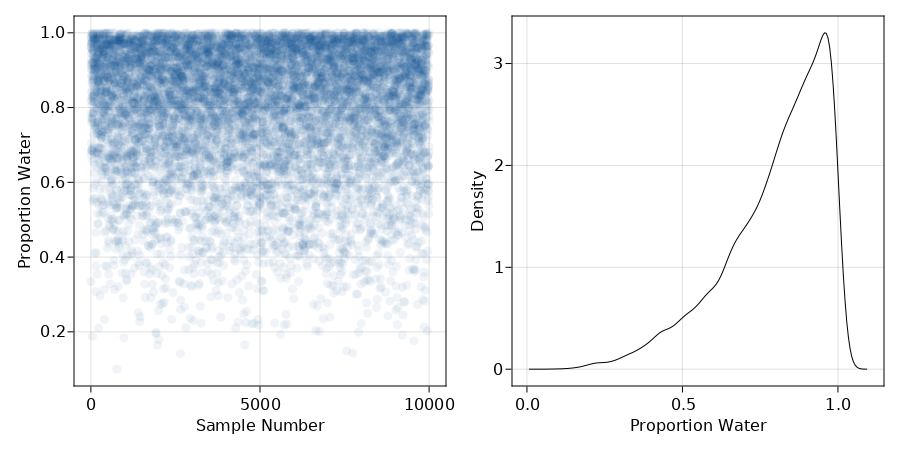

In [430]:
using CairoMakie
fig = Figure(resolution=(900,450)) 

ax1 = Axis(fig, xlabel= "Sample Number", ylabel="Proportion Water")
CairoMakie.scatter!(ax1,1:10000, samples, color=(:dodgerblue4,0.06))
fig[1,1] = ax1

ax2 = Axis(fig, xlabel= "Proportion Water", ylabel="Density")
CairoMakie.density!(ax2,samples, strokewidth=1, color=:transparent)
fig[1,2] = ax2
fig

#### Code 3.6 Percentage of parameter values less than 0.5

In [56]:
sum(posterior[p_grid .< 0.5])

0.17187458902022873

#### Code 3.7 Frequency of parameter values below 0.5

In [59]:
sum(samples .<0.5) / 10000

0.175

#### Code 3.8  How much posterior values lie between 0.5 & 0.75

In [62]:
sum(0.5 .< samples .< 0.75) / 10000

0.5978

#### Code 3.9 Where the 80th percentile lie

In [538]:
quantile(samples,0.8)

0.9429429429429429

#### Code 3.10 Middle 80% lies between 10th percentile and 80th percentile

In [64]:
quantile(samples,[0.1, 0.9])

2-element Vector{Float64}:
 0.4453453453453453
 0.8118118118118118

#### Code 3.11 Highest Posterior Density Interval

In [481]:
p_grid = range(0,stop=1,length=1000)
prior = fill(1,1000)
likelihood = pdf.(Binomial.(3,p_grid),3)
posterior = likelihood .* prior
posterior = posterior / sum(posterior)
samples = sample(p_grid, Weights(posterior),1000)
hd = hpdi(samples,alpha=0.5)

2-element Vector{Float64}:
 0.8348348348348348
 1.0

#### Figure 3.3 Highest Posterior Density Interval Plot 

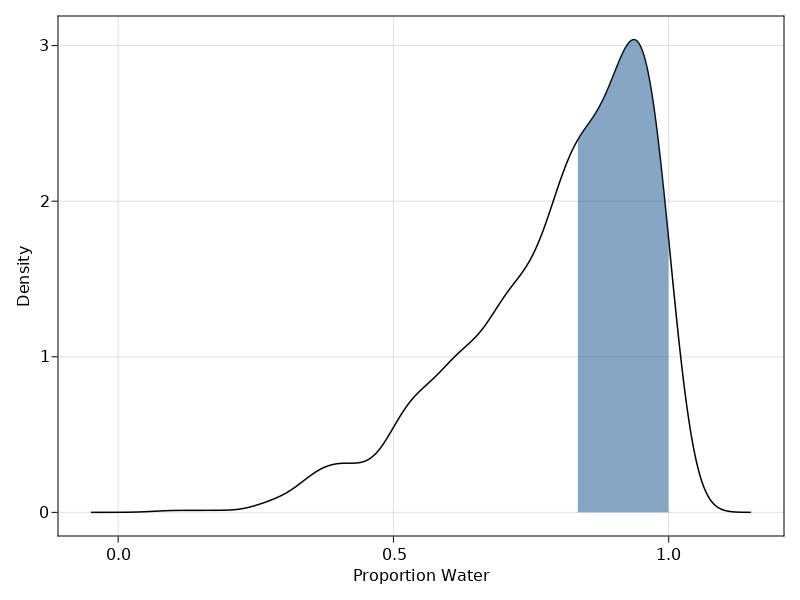

In [499]:
using Makie
using KernelDensity 
k = kde(samples)
fig = Figure()
ax = Axis(fig,xlabel="Proportion Water", ylabel="Density")
lines = Makie.lines!(k, color=:black)
Makie.band!(k.x[hd[1] .< k.x .< hd[2]],
    zeros(length(k.x[hd[1] .< k.x .< hd[2]])),
    k.density[hd[1] .< k.x .< hd[2]],color=(:dodgerblue4,0.5))
fig[1,1] = ax
fig

#### Code 3.14 -  3.16 Point estimates of the sample

In [488]:
@show mode(samples);
@show mean(samples);
@show median(samples);

mode(samples) = 1.0
mean(samples) = 0.7944244244244245
median(samples) = 0.8353353353353353


#### Figure 3.4 Point Estimates and loss function
#### Code 3.18 - 3.19

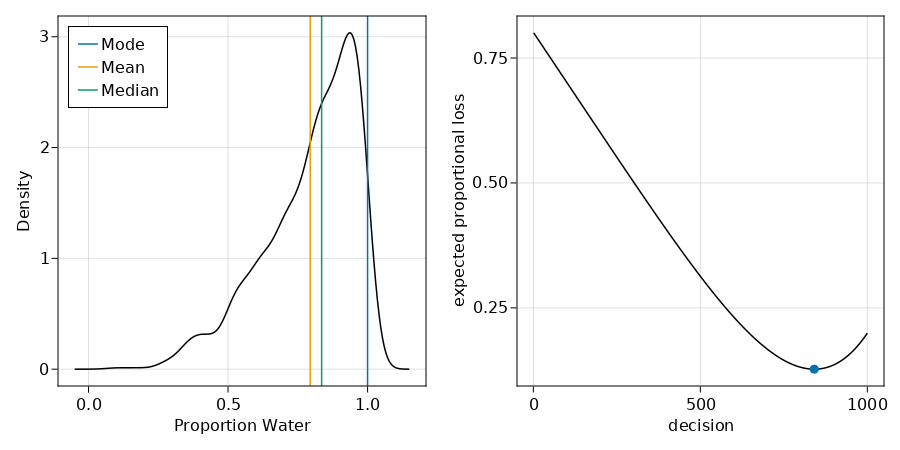

In [536]:
loss = map(p -> sum(posterior .* abs.(p .- p_grid)), p_grid)
m = findmin(loss)
fig = Figure(resolution=(900,450))

ax = Axis(fig, xlabel="Proportion Water", ylabel="Density")
Makie.density!(ax,samples,color=:transparent,strokewidth=1.5)
Makie.vlines!(ax,mode(samples), label="Mode")
Makie.vlines!(ax,mean(samples), label="Mean")
Makie.vlines!(ax,median(samples),label="Median")
axislegend(position=:lt)
ax2 = Axis(fig, xlabel="decision", ylabel="expected proportional loss")
Makie.lines!(loss, color=:black)
Makie.scatter!([m[2]],[m[1]])

fig[1,1] = ax
fig[1,2] = ax2
fig

#### Code 3.20 Probability of each observation: 0 water, 1 water, 2 water when N=2

In [537]:
pdf.(Binomial(2,0.7),0:2)

3-element Vector{Float64}:
 0.09000000000000002
 0.42000000000000004
 0.4899999999999999

#### Code 3.21 Single dummy data observation 

In [539]:
rand(Binomial(2,0.7))

1

#### Code 3.22 A set of 10 simulations

In [540]:
rand(Binomial(2,0.7),10)

10-element Vector{Int64}:
 1
 2
 2
 2
 2
 1
 2
 2
 2
 2

#### Figure 3.5 Distribution of simulated sample observations from 9 tosses of the globe
#### Code 3.23 - 3.24

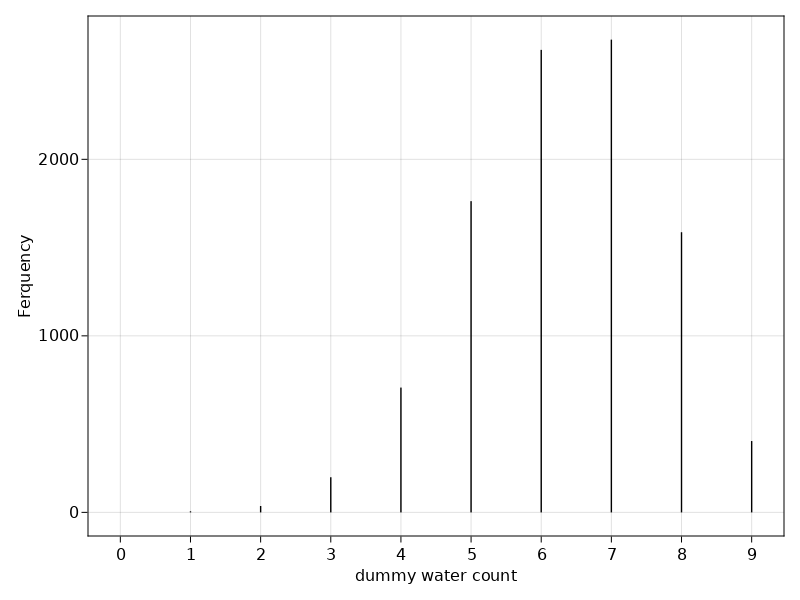

In [610]:
N = 10000
dummy_w = rand(Binomial(9,0.7),N)
fig = Figure()
ax = Axis(fig,xlabel="dummy water count", ylabel = "Ferquency",xticks=0:9)
Makie.hist!(dummy_w, bins = -0.5:1:9.5,width=0.02, color=:black)
fig[1,1] = ax
fig

#### Code 3.26

In [615]:
w = rand.(Binomial.(9,samples));